In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from scipy.constants import hbar
temp = __import__("wiki-plots.molmer_sorensen_gates_plots.ms_gate_time_evolution")
_ms = temp.molmer_sorensen_gates_plots.ms_gate_time_evolution

In [2]:
dir(_ms)

['Bloch',
 'Bloch3d',
 'Cubic_Spline',
 'Distribution',
 'ExpectOps',
 'Gate',
 'HarmonicOscillatorProbabilityFunction',
 'HarmonicOscillatorWaveFunction',
 'Lattice1d',
 'MSGateTimeEvolution',
 'MidpointNorm',
 'Odedata',
 'Odeoptions',
 'Options',
 'QDistribution',
 'Qobj',
 'QobjEvo',
 'QubitCircuit',
 'TwoModeQuadratureCorrelation',
 'WignerDistribution',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_n',
 'about',
 'absolute_import',
 'average_gate_fidelity',
 'basis',
 'bell_state',
 'berkeley',
 'berry_curvature',
 'bloch',
 'bloch3d',
 'bloch_redfield',
 'bloch_redfield_solve',
 'bloch_redfield_tensor',
 'bra',
 'breadth_first_search',
 'brmesolve',
 'build_preconditioner',
 'bures_angle',
 'bures_dist',
 'cell_structures',
 'cfg_vars',
 'charge',
 'chi_to_choi',
 'choi_to_chi',
 'choi_to_kraus',
 'choi_to_super',
 'circuit',
 'circuit_latex',
 'cite',
 'clebsch',
 'cnot',
 'coherence_function_g1',
 'coherenc

In [3]:
ms = _ms.MSGateTimeEvolution(nbar_mode=0)  

In [4]:
a=ms.gate_simulation(gates=2)

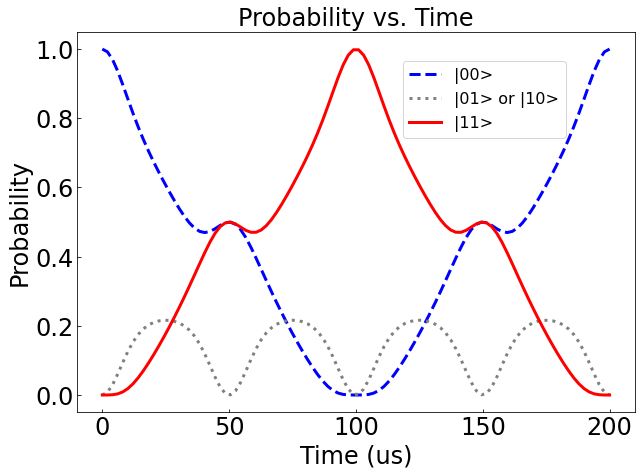

In [5]:
fs=24
plt.figure(figsize=(10,7))
plt.title("Probability vs. Time", size=fs)
plt.xlabel("Time (us)", size=fs)
plt.ylabel("Probability", size=fs)
plt.plot(a[0]*2/ms.gate_time*50,a[1], label = "|00>", color="blue", linestyle="dashed", linewidth=3)
plt.plot(a[0]*2/ms.gate_time*50,a[2]+a[3], label = "|01> or |10>", linestyle="dotted", color="grey",  linewidth=3)
plt.plot(a[0]*2/ms.gate_time*50,a[4], label = "|11>", color="red",  linewidth=3)
plt.tick_params(which='both', direction="in", labelsize=fs)
plt.legend(bbox_to_anchor=(0.57, 0.7), fontsize=16)
plt.savefig("MS_gate_evolution_theory.png", dpi=400)
plt.show()

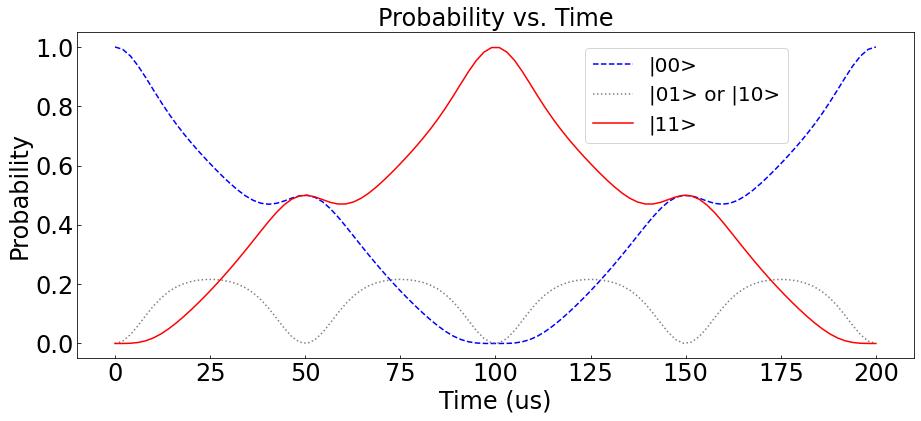

In [6]:
fs=24
plt.figure(figsize=(15,6))
plt.title("Probability vs. Time", size=fs)
plt.xlabel("Time (us)", size=fs)
plt.ylabel("Probability", size=fs)
plt.plot(a[0]*2/ms.gate_time*50,a[1], label = "|00>", color="blue", linestyle="dashed")
plt.plot(a[0]*2/ms.gate_time*50,a[2]+a[3], label = "|01> or |10>", linestyle="dotted", color="grey")
plt.plot(a[0]*2/ms.gate_time*50,a[4], label = "|11>", color="red")
plt.tick_params(which='both', direction="in", labelsize=fs)
plt.legend(bbox_to_anchor=(0.595, 0.63), fontsize=20)
plt.savefig("MS_gate_evolution_data_match.png", dpi=400)
plt.show()

In [7]:
ms = _ms.MSGateTimeEvolution(nbar_mode=2)  

In [8]:
a=ms.gate_simulation()

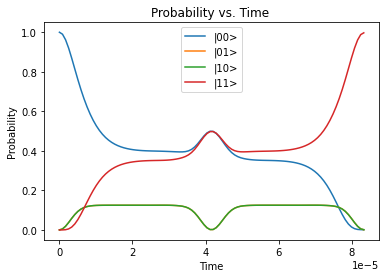

In [9]:
plt.title("Probability vs. Time ")
plt.xlabel("Time")
plt.ylabel("Probability")
plt.plot(a[0],a[1], label = "|00>")
plt.plot(a[0],a[2], label = "|01>")
plt.plot(a[0],a[3], label = "|10>")
plt.plot(a[0],a[4], label = "|11>")
plt.legend()
plt.show()

In [10]:
import numpy as np
import matplotlib.pyplot as _plt
import pydux.lib.analysis.conversions as _conv
from math import*

In [11]:
eta=0.12
omega= 2*np.pi*100e3
epsilo=4*eta*omega
m_phonon=20
lamda=eta**2*omega**2/epsilo
kappa=eta**2*omega**2/(epsilo**2)

In [12]:
def alpha(t):
    return (eta*omega/epsilo)*(np.exp(-1j*epsilo*t)-1)
def gamma(t):
    return (lamda*t-kappa*np.sin(epsilo*t))

In [13]:
def population(t):
    factor1=np.exp(-16*(abs(alpha(t)))**2*(m_phonon+1/2))
    factor2=4*np.cos(4*gamma(t))*np.exp(-4*(abs(alpha(t)))**2*(m_phonon+1/2))
    p2=1/8*(3+factor1+factor2)
    p1=1/4*(1-factor1)
    p0=1/8*(3+factor1-factor2)
    return p2,p1,p0

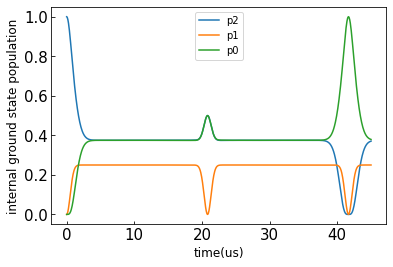

In [14]:
time=45
times = np.linspace(0, time*_conv.us_to_s, 1000)
fig, ax = _plt.subplots(figsize=(6, 4))
ax.plot(times*_conv.s_to_us,population(times)[0],label="p2")
ax.plot(times*_conv.s_to_us,population(times)[1],label="p1")
ax.plot(times*_conv.s_to_us,population(times)[2],label="p0")
ax.set_xlabel("time(us)", fontsize=12)
ax.set_ylabel(r"internal ground state population", fontsize=12)
ax.tick_params(direction="in", labelsize=15)
_plt.legend()
_plt.show()